In [278]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
import os
from astropy.modeling import models
from astropy import units as u
from scipy.optimize import curve_fit
from astropy.timeseries import LombScargle
from scipy.special import voigt_profile
import Analysis_functions as AF
from importlib import reload
import itertools
from scipy.stats import chi2

In [16]:
days = ['2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', 
        '2023-01-25', '2023-01-26', '2023-01-27', '2023-02-01', '2023-02-02', '2023-02-03']
new = True

blaze_dir = 'Blaze-data'
dir_name = 'Corr-data'
CCF_dir_name = 'CCF_RV-data'
fit_params_dict = {}
fit_err_dict = {}
time_dict = {}

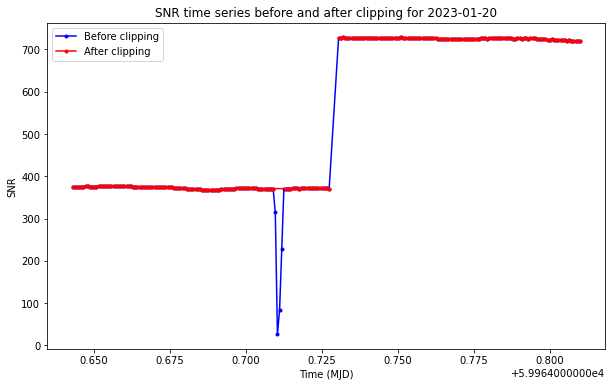

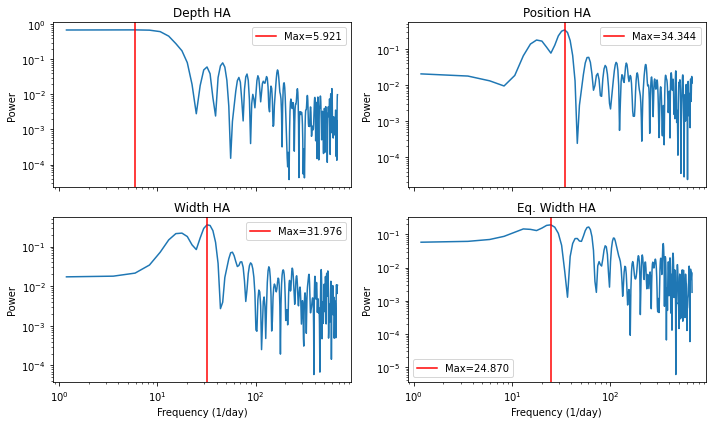

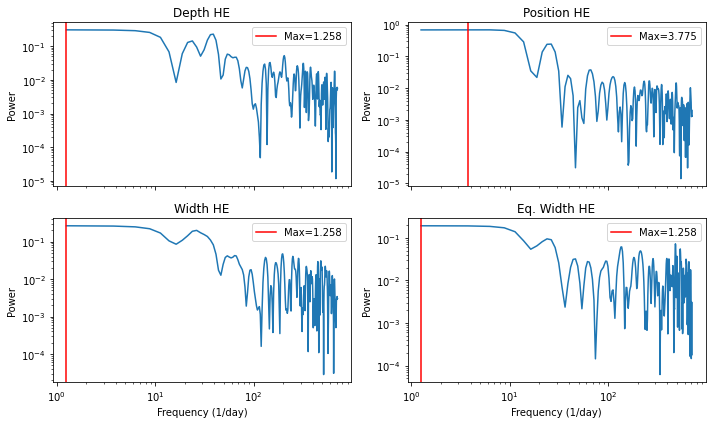

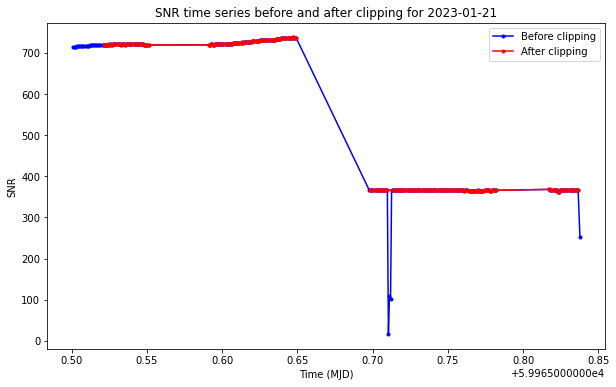

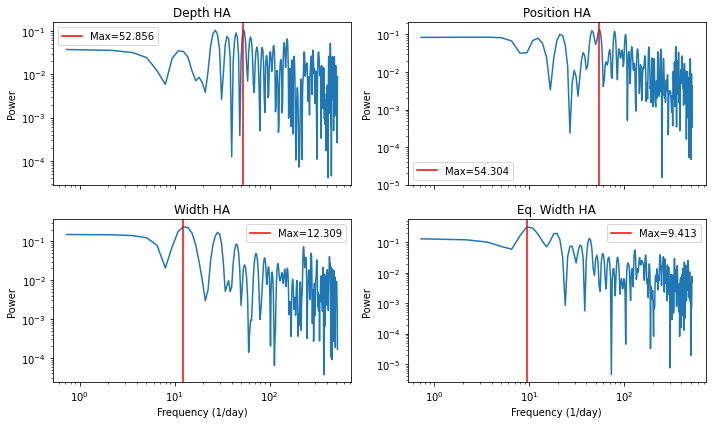

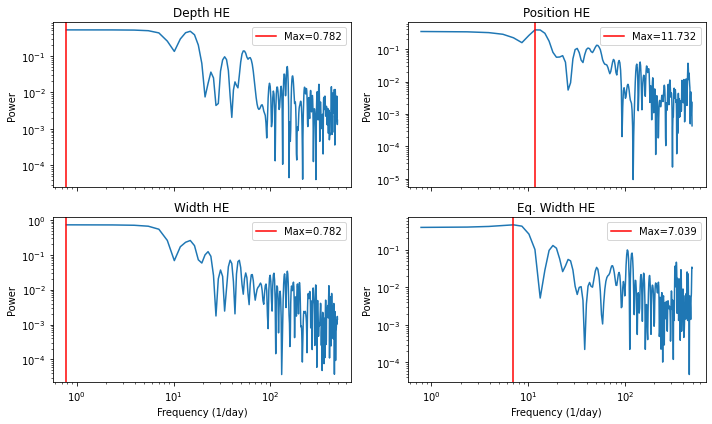

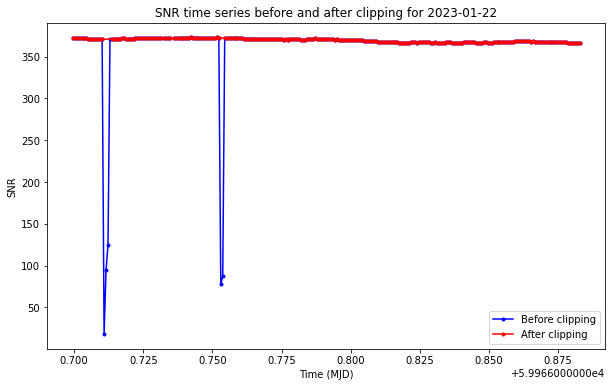

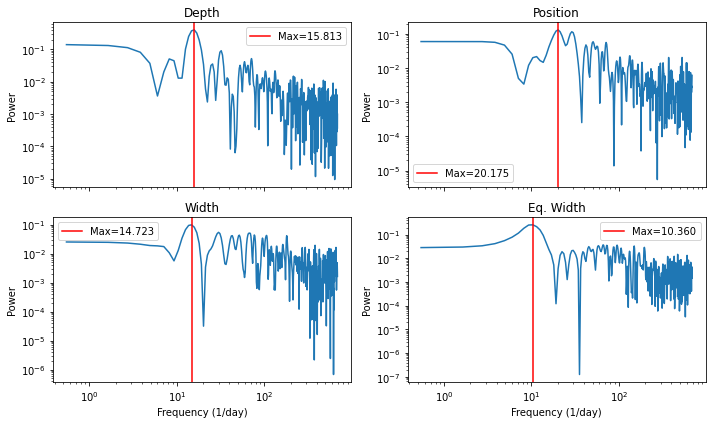

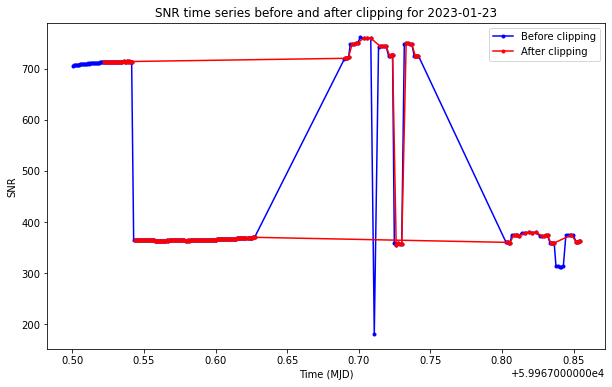

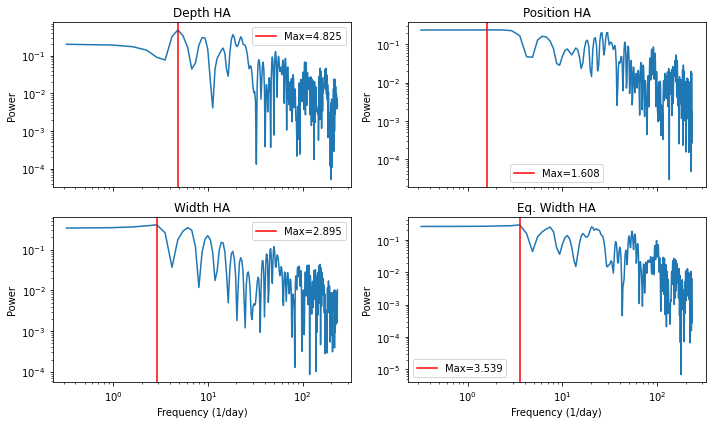

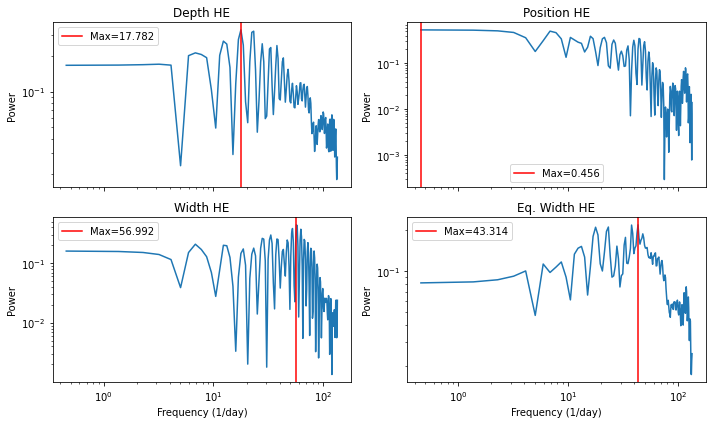

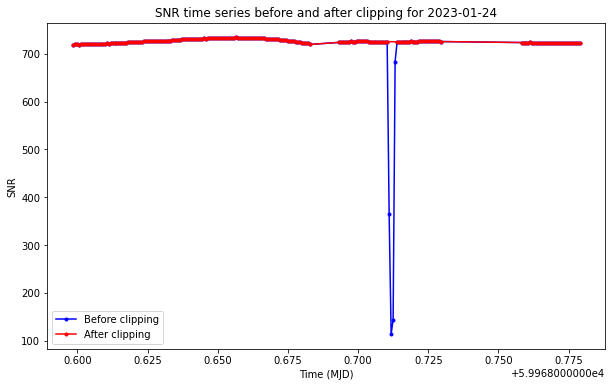

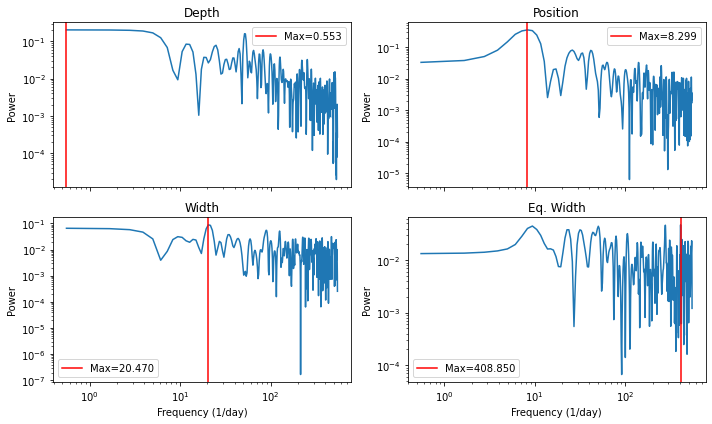

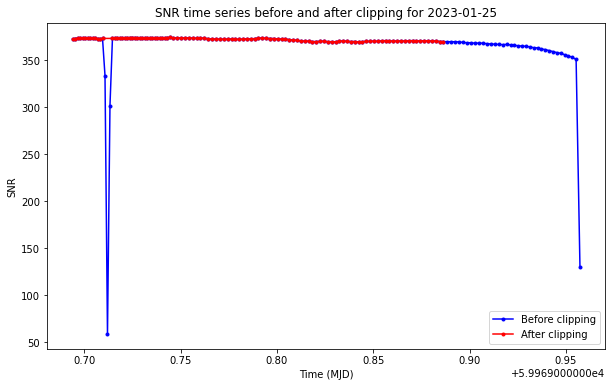

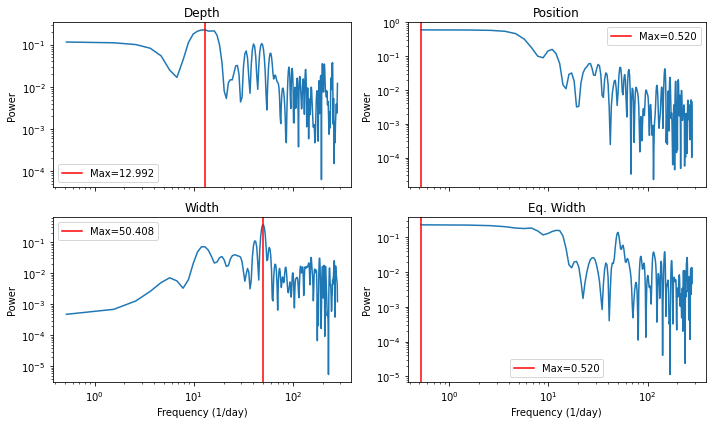

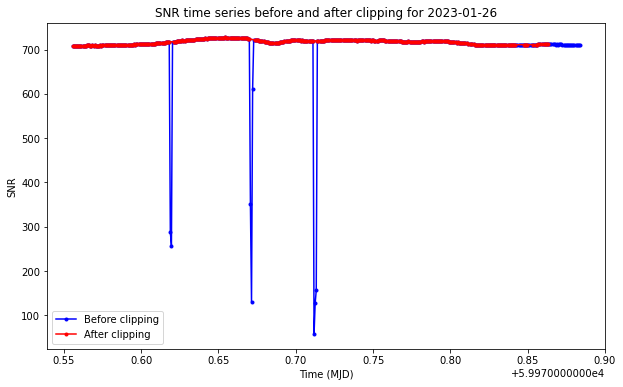

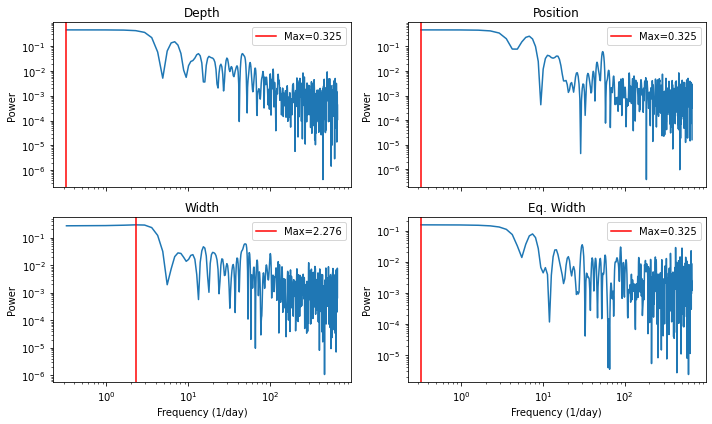

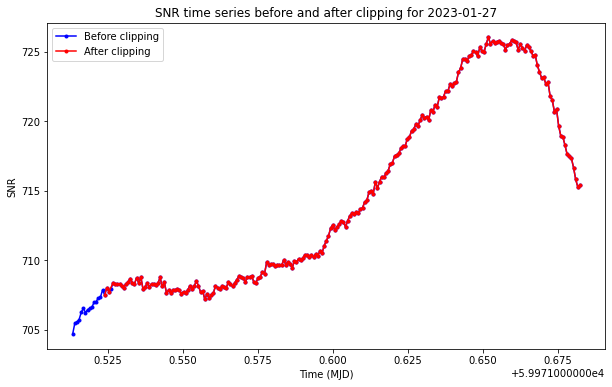

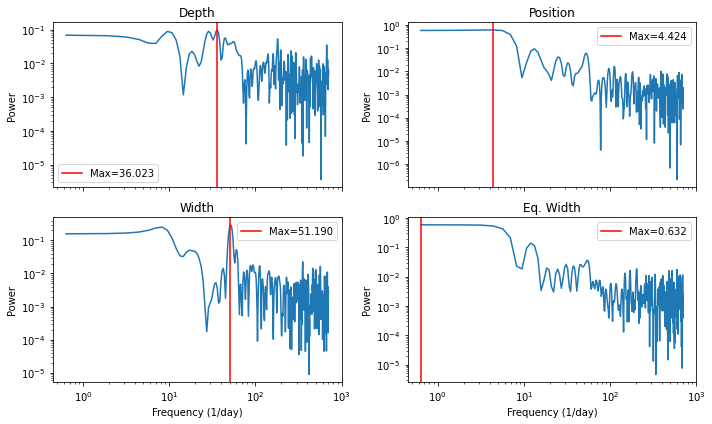

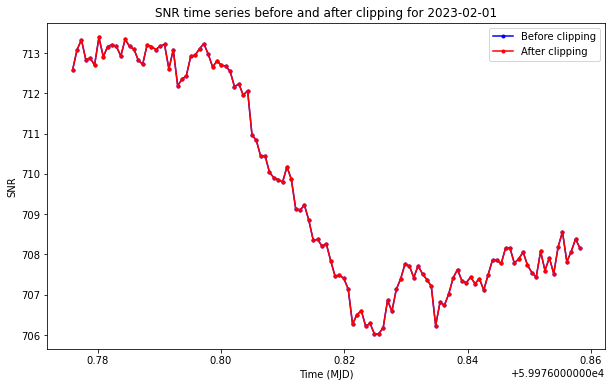

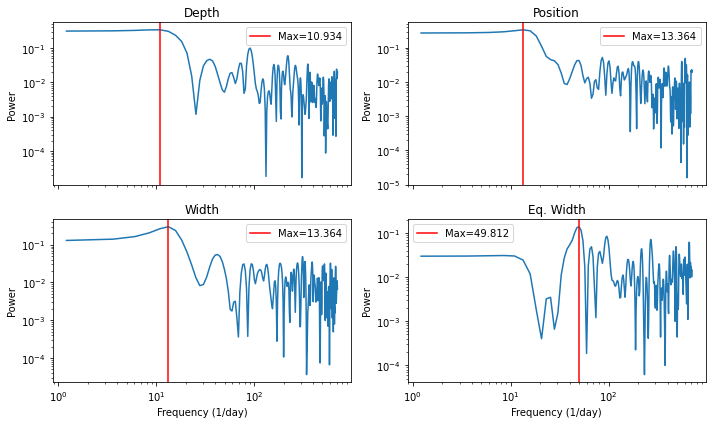

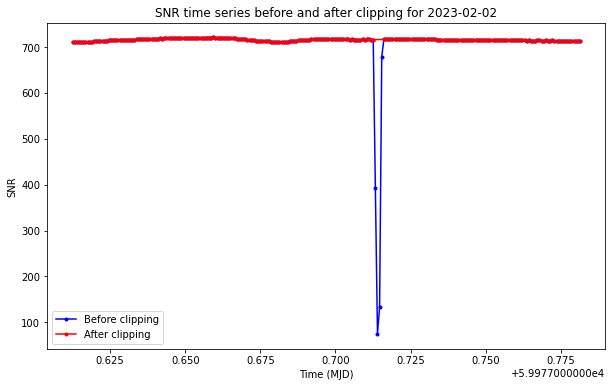

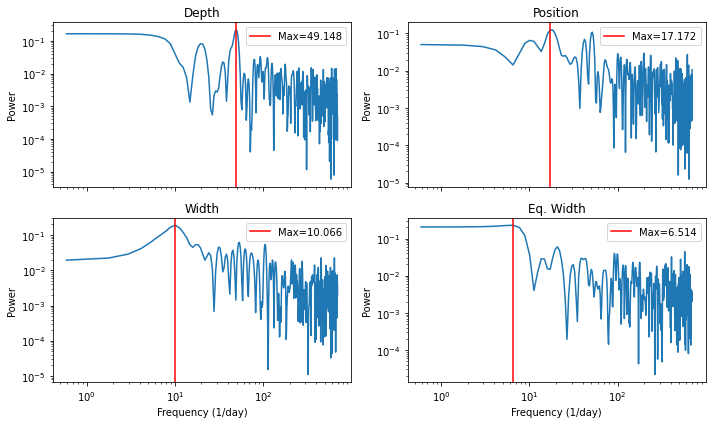

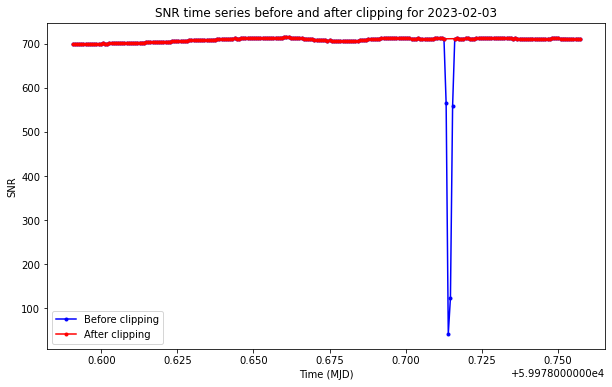

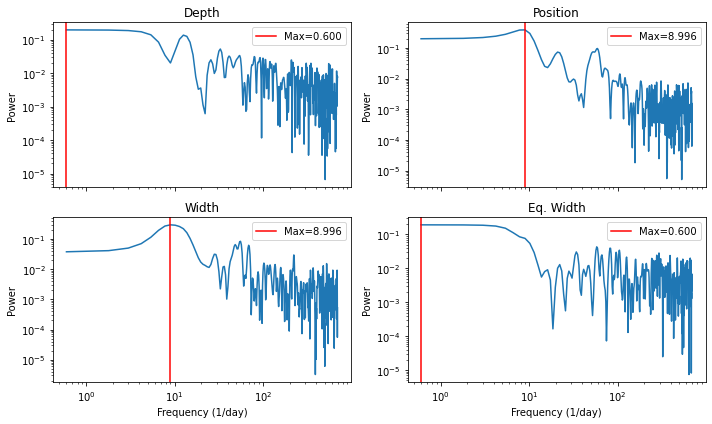

In [283]:
reload(AF)

for day in days:
    
    #Defining the location
    location = '/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/new_Solar-data/'+day
    os.chdir(location)
    if not os.path.exists('Plot_Results'):
        os.mkdir('Plot_Results')
    
    #Extracting the data
    if new:
        #tot_lamda, tot_spctr, tot_norm_spctr, tot_err, tot_norm_err, tot_SNR, tot_mode, tot_date, tot_RV, tot_RV_err, tot_FWHM, tot_FWHM_err, tot_BIS_SPAN, tot_BIS_SPAN_err, tot_CONTRAST, tot_CONTRAST_err, tot_H2O, tot_H2O_err, tot_O2, tot_O2_err, tot_CO2, tot_CO2_err, tot_AIRM 
        long_dataset = AF.new_extraction(dir_name, blaze_dir, CCF_dir_name, 14)

    else:
        #tot_lamda, tot_spctr, tot_norm_spctr, tot_err, tot_norm_err, tot_SNR, tot_mode, tot_date, tot_RV, tot_RV_err, tot_FWHM, tot_FWHM_err, tot_BIS_SPAN, tot_BIS_SPAN_err, tot_CONTRAST, tot_CONTRAST_err, tot_H2O, tot_H2O_err, tot_O2, tot_O2_err, tot_CO2, tot_CO2_err, tot_AIRM 
        long_dataset = AF.extraction(dir_name, blaze_dir, CCF_dir_name, 14)
    
    #For data reduction and plotting
    tot_SNR = long_dataset[5]
    tot_mode = long_dataset[6]
    tot_date = long_dataset[7]
    tot_RV = long_dataset[8]
    tot_AIRM = long_dataset[-1]
    sig = 200
    
    #For fitting the He triplet
    lower_lim = 10831.5
    upper_lim = 10834.1
    guess_params = [-0.06, -100, 10833.3, 0.1, 0.008]
    bounds_param = ((-np.inf, -np.inf, 10833.2, -np.inf, -np.inf),(0, np.inf, 10833.4, np.inf, np.inf)) 

    
    #Distinguish two cases depending on the number of modes of observation
    #If there are two modes of observation
    if np.sum(tot_mode=='A') != len(tot_mode) and np.sum(tot_mode=='E')!= len(tot_mode):
        total_lamda_HA, total_lamda_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[0], tot_RV, tot_AIRM, sig)

        total_spctr_HA, total_spctr_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[1], tot_RV, tot_AIRM, sig)

        total_norm_spctr_HA, total_norm_spctr_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[2], tot_RV, tot_AIRM, sig)

        total_err_HA, total_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[3], tot_RV, tot_AIRM, sig)

        total_norm_err_HA, total_norm_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[4], tot_RV, tot_AIRM, sig)
        
        total_SNR_HA, total_SNR_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[5], tot_RV, tot_AIRM, sig)

        date_HA, date_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[7], tot_RV, tot_AIRM, sig)

        total_RV_HA, total_RV_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[8], tot_RV, tot_AIRM, sig)

        total_RV_err_HA, total_RV_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[9], tot_RV, tot_AIRM, sig)

        total_FWHM_HA, total_FWHM_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[10], tot_RV, tot_AIRM, sig)

        total_FWHM_err_HA, total_FWHM_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[11], tot_RV, tot_AIRM, sig)

        total_BIS_SPAN_HA, total_BIS_SPAN_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[12], tot_RV, tot_AIRM, sig)

        total_BIS_SPAN_err_HA, total_BIS_SPAN_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[13], tot_RV, tot_AIRM, sig)

        total_CONTRAST_HA, total_CONTRAST_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[14], tot_RV, tot_AIRM, sig)

        total_CONTRAST_err_HA, total_CONTRAST_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[15], tot_RV, tot_AIRM, sig)

        total_H2O_HA, total_H2O_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[16], tot_RV, tot_AIRM, sig)

        total_H2O_err_HA, total_H2O_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[17], tot_RV, tot_AIRM, sig)

        total_O2_HA, total_O2_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[18], tot_RV, tot_AIRM, sig)

        total_O2_err_HA, total_O2_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[19], tot_RV, tot_AIRM, sig)

        total_CO2_HA, total_CO2_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[20], tot_RV, tot_AIRM, sig)

        total_CO2_err_HA, total_CO2_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[21], tot_RV, tot_AIRM, sig)

        total_AIRM_HA, total_AIRM_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[22], tot_RV, tot_AIRM, sig)

        #Plotting the SNR time series to make sure the outliers have been removed
        plt.figure(figsize=[10, 6])
        plt.plot(tot_date, tot_SNR, 'b.', linestyle='-', label='Before clipping')
        plt.plot(date_HA, total_SNR_HA, 'r.', linestyle='-', label='After clipping')
        plt.plot(date_HE, total_SNR_HE, 'r.', linestyle='-')
        plt.xlabel('Time (MJD)')
        plt.ylabel('SNR')
        plt.title('SNR time series before and after clipping for '+day)
        plt.legend()

        #Fitting the He triplet
        theta_HA, err_theta_HA = AF.fit_spctr_line(AF.gaussian_L, lower_lim, upper_lim, guess_params, 
                                               bounds_param, total_lamda_HA, total_norm_spctr_HA, total_norm_err_HA, 'r', False)

        theta_HE, err_theta_HE = AF.fit_spctr_line(AF.gaussian_L, lower_lim, upper_lim, guess_params, 
                                               bounds_param, total_lamda_HE, total_norm_spctr_HE, total_norm_err_HE, 'k', False)

        LS_depth_HA = LombScargle(date_HA, theta_HA[:,0]).autopower(nyquist_factor=1)
        LS_position_HA = LombScargle(date_HA, theta_HA[:,2]).autopower(nyquist_factor=1)
        LS_width_HA = LombScargle(date_HA, theta_HA[:,3]).autopower(nyquist_factor=1)
        LS_ew_HA = LombScargle(date_HA, theta_HA[:,-1]).autopower(nyquist_factor=1)
   
        LS_depth_HE = LombScargle(date_HE, theta_HE[:,0]).autopower(nyquist_factor=1)
        LS_position_HE = LombScargle(date_HE, theta_HE[:,2]).autopower(nyquist_factor=1)
        LS_width_HE = LombScargle(date_HE, theta_HE[:,3]).autopower(nyquist_factor=1)
        LS_ew_HE = LombScargle(date_HE, theta_HE[:,-1]).autopower(nyquist_factor=1)
   
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth_HA[0], LS_depth_HA[1])
        ax1.axvline(LS_depth_HA[0][np.where(LS_depth_HA[1]==np.max(LS_depth_HA[1]))], color='r', label='Max=%.3f' %LS_depth_HA[0][np.where(LS_depth_HA[1]==np.max(LS_depth_HA[1]))])
        ax2.loglog(LS_position_HA[0], LS_position_HA[1])
        ax2.axvline(LS_position_HA[0][np.where(LS_position_HA[1]==np.max(LS_position_HA[1]))], color='r', label='Max=%.3f' %LS_position_HA[0][np.where(LS_position_HA[1]==np.max(LS_position_HA[1]))])
        ax3.loglog(LS_width_HA[0], LS_width_HA[1])
        ax3.axvline(LS_width_HA[0][np.where(LS_width_HA[1]==np.max(LS_width_HA[1]))], color='r', label='Max=%.3f' %LS_width_HA[0][np.where(LS_width_HA[1]==np.max(LS_width_HA[1]))])
        ax4.loglog(LS_ew_HA[0], LS_ew_HA[1])
        ax4.axvline(LS_ew_HA[0][np.where(LS_ew_HA[1]==np.max(LS_ew_HA[1]))], color='r', label='Max=%.3f' %LS_ew_HA[0][np.where(LS_ew_HA[1]==np.max(LS_ew_HA[1]))])
        ax1.set_title('Depth HA')
        ax2.set_title('Position HA')
        ax3.set_title('Width HA')
        ax4.set_title('Eq. Width HA')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.legend()
        ax2.legend()
        ax3.legend()
        ax4.legend()
        fig.tight_layout()
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth_HE[0], LS_depth_HE[1])
        ax1.axvline(LS_depth_HE[0][np.where(LS_depth_HE[1]==np.max(LS_depth_HE[1]))], color='r', label='Max=%.3f' %LS_depth_HE[0][np.where(LS_depth_HE[1]==np.max(LS_depth_HE[1]))])
        ax2.loglog(LS_position_HE[0], LS_position_HE[1])
        ax2.axvline(LS_position_HE[0][np.where(LS_position_HE[1]==np.max(LS_position_HE[1]))], color='r', label='Max=%.3f' %LS_position_HE[0][np.where(LS_position_HE[1]==np.max(LS_position_HE[1]))])
        ax3.loglog(LS_width_HE[0], LS_width_HE[1])
        ax3.axvline(LS_width_HE[0][np.where(LS_width_HE[1]==np.max(LS_width_HE[1]))], color='r', label='Max=%.3f' %LS_width_HE[0][np.where(LS_width_HE[1]==np.max(LS_width_HE[1]))])
        ax4.loglog(LS_ew_HE[0], LS_ew_HE[1])
        ax4.axvline(LS_ew_HE[0][np.where(LS_ew_HE[1]==np.max(LS_ew_HE[1]))], color='r', label='Max=%.3f' %LS_ew_HE[0][np.where(LS_ew_HE[1]==np.max(LS_ew_HE[1]))])
        ax1.set_title('Depth HE')
        ax2.set_title('Position HE')
        ax3.set_title('Width HE')
        ax4.set_title('Eq. Width HE')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.legend()
        ax2.legend()
        ax3.legend()
        ax4.legend()
        fig.tight_layout()


        #Storing the best-fit values and their errors
        fit_params_dict[f"{day} HA"] = theta_HA
        fit_params_dict[f"{day} HE"] = theta_HE
        
        fit_err_dict[f"{day} HA"] = err_theta_HA
        fit_err_dict[f"{day} HE"] = err_theta_HE
        
        time_dict[f"{day} HA"] = date_HA
        time_dict[f"{day} HE"] = date_HE
    
    #If there is one mode of observation
    else:
        total_lamda = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[0], tot_RV, tot_AIRM, sig)

        total_spctr = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[1], tot_RV, tot_AIRM, sig)

        total_norm_spctr = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[2], tot_RV, tot_AIRM, sig)

        total_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[3], tot_RV, tot_AIRM, sig)

        total_norm_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[4], tot_RV, tot_AIRM, sig)

        total_SNR = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[5], tot_RV, tot_AIRM, sig)

        date = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[7], tot_RV, tot_AIRM, sig)

        total_RV = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[8], tot_RV, tot_AIRM, sig)

        total_RV_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[9], tot_RV, tot_AIRM, sig)

        total_FWHM = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[10], tot_RV, tot_AIRM, sig)

        total_FWHM_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[11], tot_RV, tot_AIRM, sig)

        total_BIS_SPAN = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[12], tot_RV, tot_AIRM, sig)

        total_BIS_SPAN_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[13], tot_RV, tot_AIRM, sig)

        total_CONTRAST = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[14], tot_RV, tot_AIRM, sig)

        total_CONTRAST_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[15], tot_RV, tot_AIRM, sig)

        total_H2O = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[16], tot_RV, tot_AIRM, sig)

        total_H2O_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[17], tot_RV, tot_AIRM, sig)

        total_O2 = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[18], tot_RV, tot_AIRM, sig)

        total_O2_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[19], tot_RV, tot_AIRM, sig)

        total_CO2 = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[20], tot_RV, tot_AIRM, sig)

        total_CO2_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[21], tot_RV, tot_AIRM, sig)

        total_AIRM = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[22], tot_RV, tot_AIRM, sig)

        #Plotting the SNR time series to make sure the outliers have been removed
        plt.figure(figsize=[10, 6])
        plt.plot(tot_date, tot_SNR, 'b.', linestyle='-', label='Before clipping')
        plt.plot(date, total_SNR, 'r.', linestyle='-', label='After clipping')
        plt.xlabel('Time (MJD)')
        plt.ylabel('SNR')
        plt.title('SNR time series before and after clipping for '+day)
        plt.legend()
        
        #Fitting the He triplet 
        theta, err_theta = AF.fit_spctr_line(AF.gaussian_L, lower_lim, upper_lim, guess_params, 
                                             bounds_param, total_lamda, total_norm_spctr, total_norm_err, 'r', False)
        
        LS_depth = LombScargle(date, theta[:,0]).autopower(nyquist_factor=1)
        LS_position = LombScargle(date, theta[:,2]).autopower(nyquist_factor=1)
        LS_width = LombScargle(date, theta[:,3]).autopower(nyquist_factor=1)
        LS_ew = LombScargle(date, theta[:,-1]).autopower(nyquist_factor=1)
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth[0], LS_depth[1])
        ax1.axvline(LS_depth[0][np.where(LS_depth[1]==np.max(LS_depth[1]))], color='r', label='Max=%.3f' %LS_depth[0][np.where(LS_depth[1]==np.max(LS_depth[1]))])
        ax2.loglog(LS_position[0], LS_position[1])
        ax2.axvline(LS_position[0][np.where(LS_position[1]==np.max(LS_position[1]))], color='r', label='Max=%.3f' %LS_position[0][np.where(LS_position[1]==np.max(LS_position[1]))])
        ax3.loglog(LS_width[0], LS_width[1])
        ax3.axvline(LS_width[0][np.where(LS_width[1]==np.max(LS_width[1]))], color='r', label='Max=%.3f' %LS_width[0][np.where(LS_width[1]==np.max(LS_width[1]))])
        ax4.loglog(LS_ew[0], LS_ew[1])
        ax4.axvline(LS_ew[0][np.where(LS_ew[1]==np.max(LS_ew[1]))], color='r', label='Max=%.3f' %LS_ew[0][np.where(LS_ew[1]==np.max(LS_ew[1]))])
        ax1.set_title('Depth')
        ax2.set_title('Position')
        ax3.set_title('Width')
        ax4.set_title('Eq. Width')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.legend()
        ax2.legend()
        ax3.legend()
        ax4.legend()
        fig.tight_layout()

        #Storing the best-fit values
        fit_params_dict[f"{day}"] = theta
        
        fit_err_dict[f"{day}"] = err_theta
        
        time_dict[f"{day}"] = date
        
        
    plt.show()
    
    
    

# Plotting the big dataset

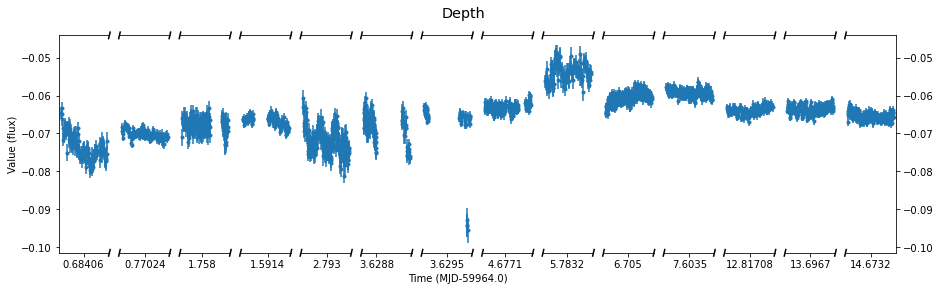

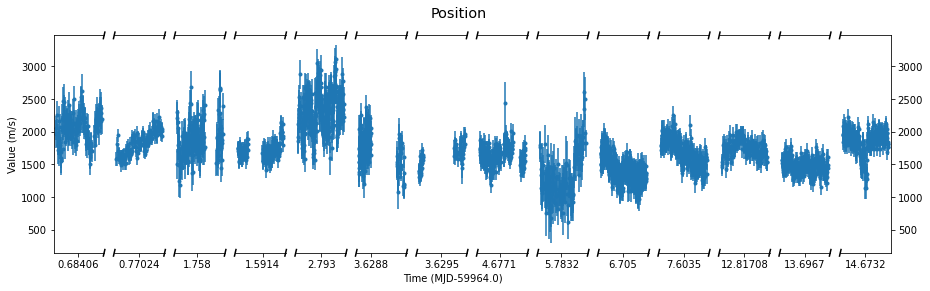

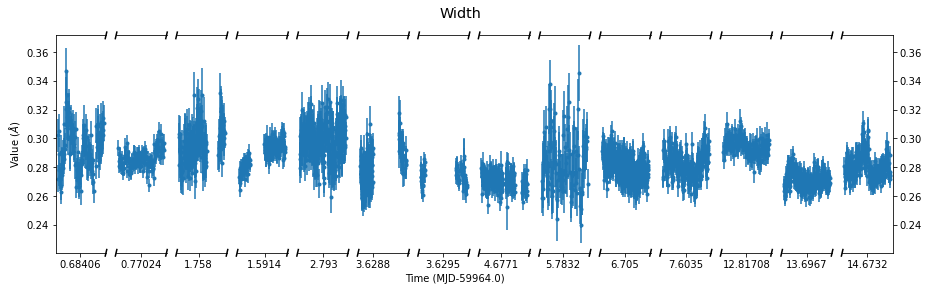

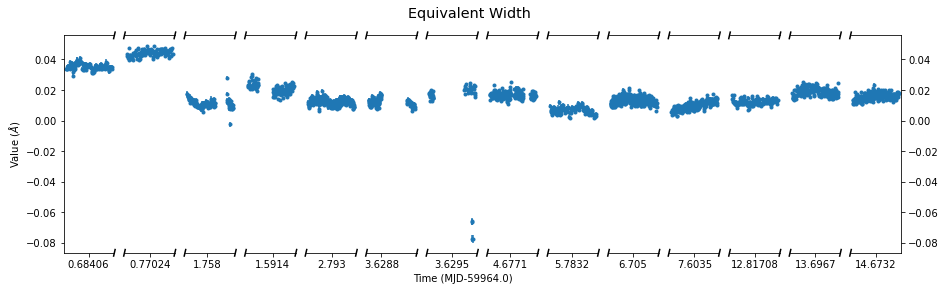

In [284]:
#Plotting one of the parameters of interest for all the days
params_of_interest = ['Depth', 'Position', 'Width', 'Equivalent Width']
units_of_interest = ['(flux)', '(m/s)', '($\AA$)', '($\AA$)'] 
indexes_of_interest = [0, 2, 3, -1]

#Reference value of the He triplet
ref_He = AF.air2vac((10830.33977+10830.25010)/2) #From NIST database

#Define excess in time
excess=59964.0

for i in range(len(params_of_interest)):
    fig, axs = plt.subplots(1, len(fit_params_dict.keys()), sharey=True, figsize=[15, 4])
    fig.suptitle(params_of_interest[i], fontsize="x-large")
    axs = axs.ravel()

    # Loop over the keys and values in the fit_params_dict dictionary
    for day in fit_params_dict:
        key_list = list(fit_params_dict.keys())

        index = key_list.index(day)

        param_list = np.array([param[indexes_of_interest[i]] for param in fit_params_dict[day]])
        err_list = np.array([err[indexes_of_interest[i]] for err in fit_err_dict[day]])
        time_list = np.array([time-excess for time in time_dict[day]])
        if params_of_interest[i]=='Position':
            axs[index].errorbar(time_list, (param_list-ref_He)*3e8/ref_He, yerr=err_list*3e8/ref_He, fmt='.', label=day)
        else:
            axs[index].errorbar(time_list, param_list, yerr=err_list, fmt='.', label=day)

        #Adding the breaks
        d = .015  

        if index==0:
            axs[index].spines['right'].set_visible(False)
            axs[index].set_ylabel('Value '+units_of_interest[i])
            kwargs = dict(transform=axs[index].transAxes, color='k', clip_on=False)
            axs[index].plot((1-d, 1+d), (-d, +d), **kwargs) #Bottom right
            axs[index].plot((1-d, 1+d), (1-d, 1+d), **kwargs) #Top right

        elif index==len(fit_params_dict.keys())-1:
            axs[index].spines['left'].set_visible(False)
            axs[index].yaxis.tick_right()
            axs[index].tick_params(labelright='off')

            kwargs.update(transform=axs[index].transAxes)
            axs[index].plot((-d, +d), (1-d, 1+d), **kwargs) #Top left
            axs[index].plot((-d, +d), (-d, +d), **kwargs) #Bottom left

        else:
            axs[index].spines['right'].set_visible(False)
            axs[index].spines['left'].set_visible(False)
            axs[index].get_yaxis().set_visible(False)

            kwargs = dict(transform=axs[index].transAxes, color='k', clip_on=False)
            axs[index].plot((1-d, 1+d), (-d, +d), **kwargs)
            axs[index].plot((1-d, 1+d), (1-d, 1+d), **kwargs)

            kwargs.update(transform=axs[index].transAxes)
            axs[index].plot((-d, +d), (1-d, 1+d), **kwargs)
            axs[index].plot((-d, +d), (-d, +d), **kwargs)

        axs[index].set_xticks([np.mean(time_list)])
        axs[7].set_xlabel('Time (MJD-'+str(excess)+')', ha='right')

    plt.show()



# Inspecting the periodograms

In [240]:
def phasefold(t, T, nu):
    A = (t-T)*nu
    return A%1

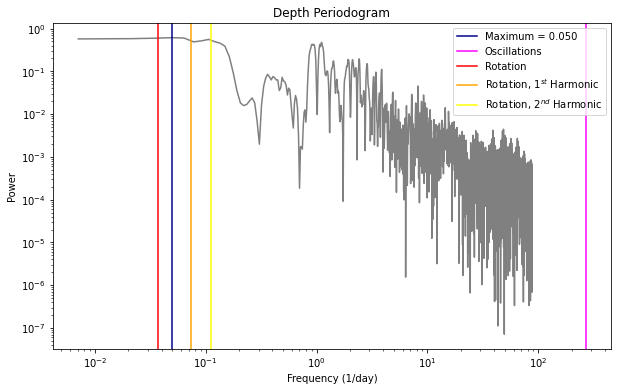

1.0
9086.683767175711 2471


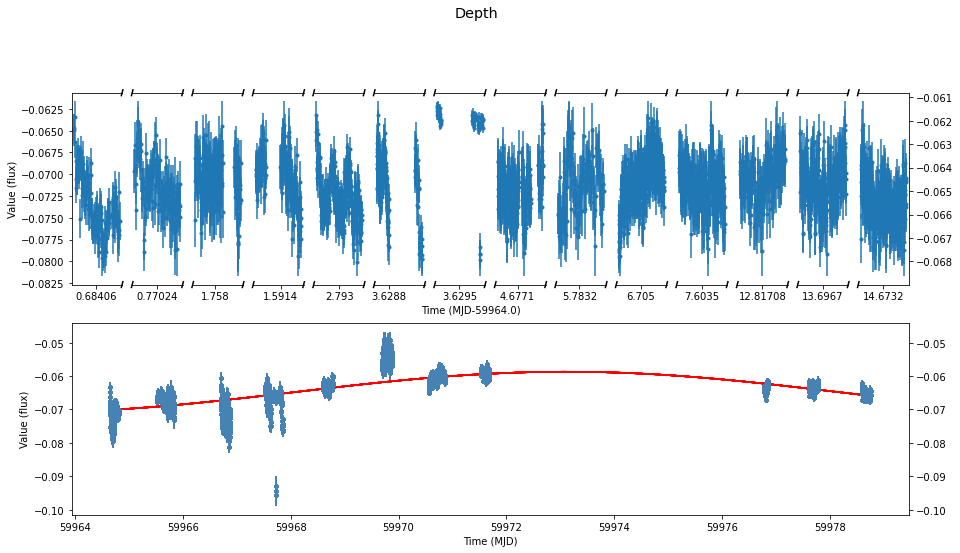

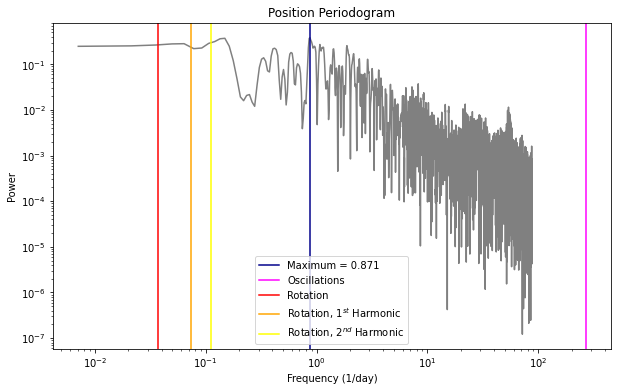

1.0
7143.030342729857 2471


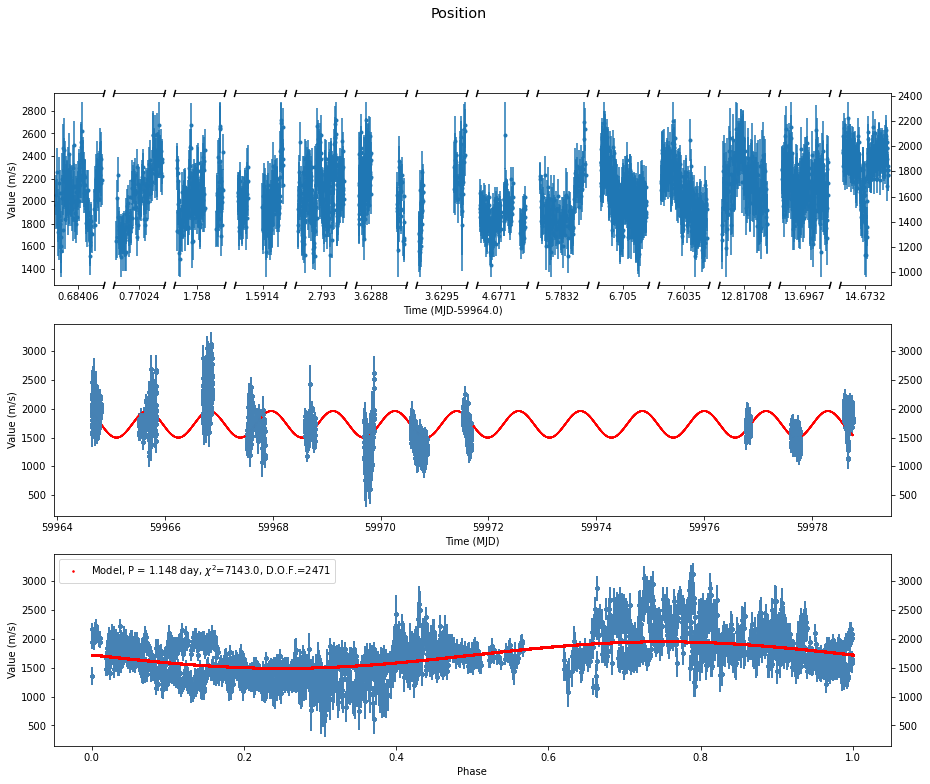

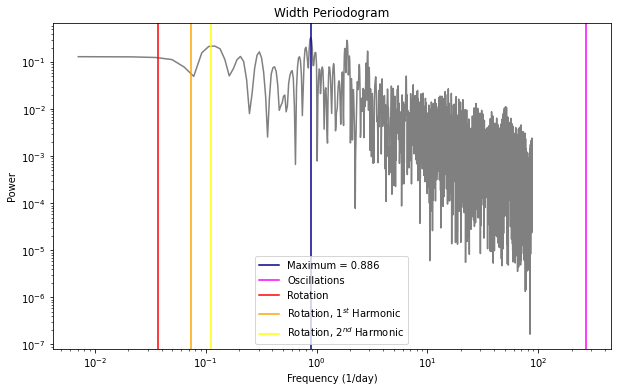

1.0
4124.598717341213 2471


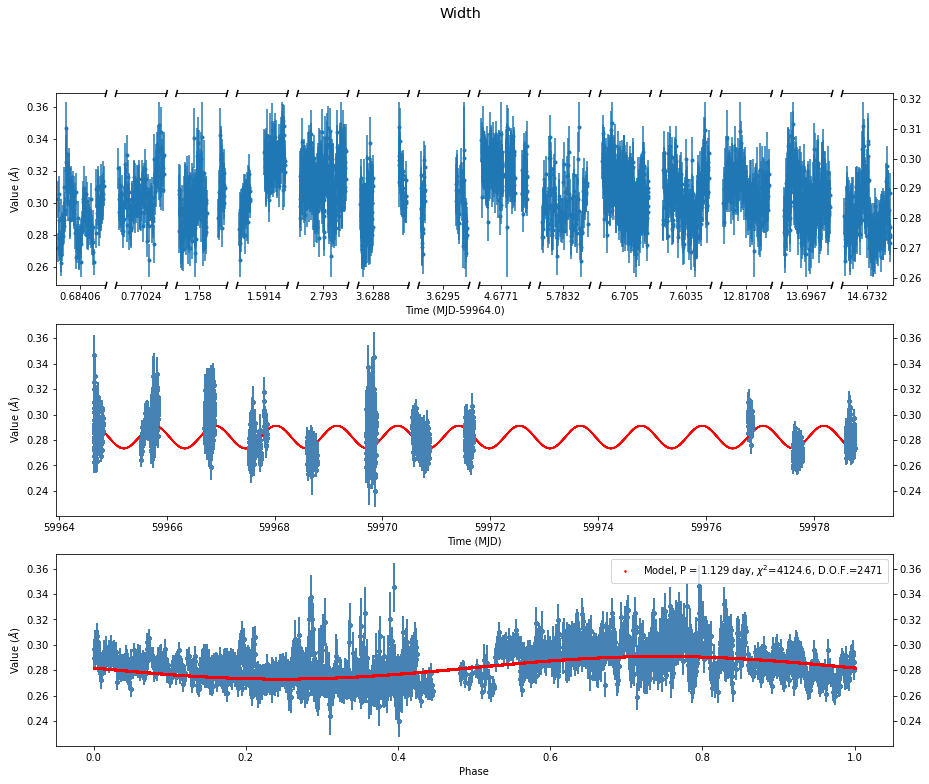

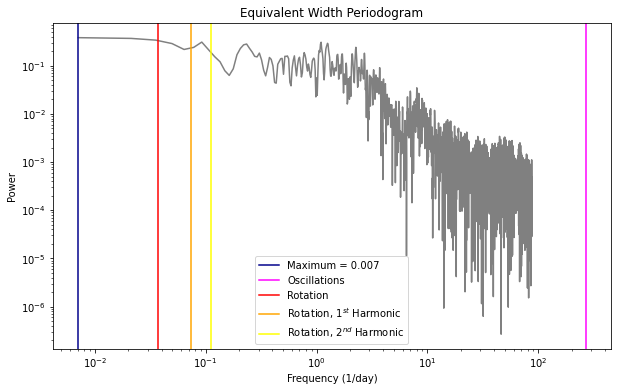

1.0
156180.56384489237 2471


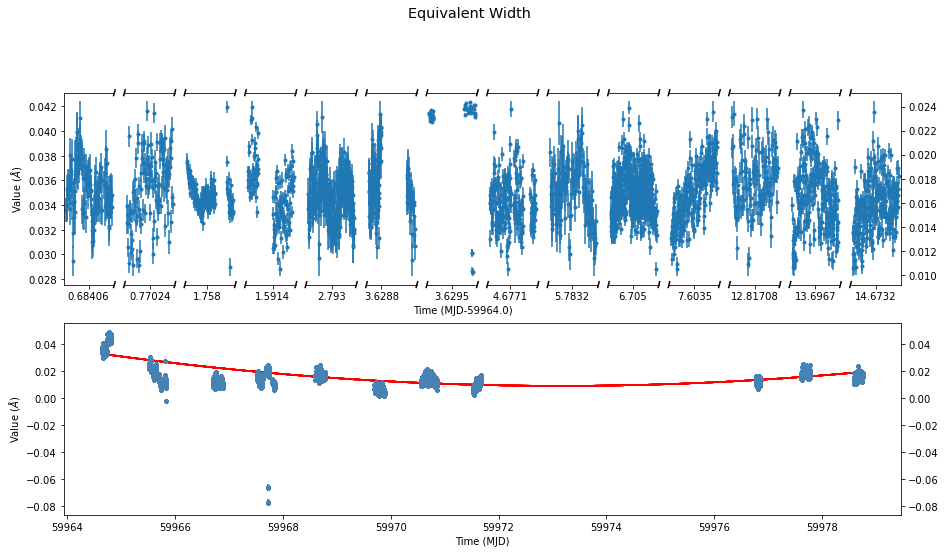

In [293]:
#Frequency of granulation 
oscillation_freq = 24*60/5.4 #in 1/days!!

#List to store the sinusoidal trend frequencies
freqs = []
for i in range(len(params_of_interest)):
    long_param = []
    long_param_err = []
    long_time = []
    
    # Loop over the keys and values in the fit_params_dict dictionary
    for day in fit_params_dict:
        key_list = list(fit_params_dict.keys())

        index = key_list.index(day)

        param_list = [param[indexes_of_interest[i]] for param in fit_params_dict[day]]
        err_list = [err[indexes_of_interest[i]] for err in fit_err_dict[day]]
        time_list = [time for time in time_dict[day]]

        long_param.append(param_list)
        long_param_err.append(err_list)
        long_time.append(time_list)

    long_param = np.array(list(itertools.chain.from_iterable(long_param)))
    long_param_err = np.array(list(itertools.chain.from_iterable(long_param_err)))
    long_time = np.array(list(itertools.chain.from_iterable(long_time)))


    LS = LombScargle(long_time, long_param).autopower(nyquist_factor=1)
    plt.figure(figsize=[10, 6])
    plt.loglog(LS[0], LS[1], color='grey')
    max_power = np.where(LS[1]==max(LS[1]))
    plt.axvline(LS[0][max_power], color='darkblue', label='Maximum = %.3f' %LS[0][max_power])
    plt.axvline(oscillation_freq, color='magenta', label='Oscillations')
    plt.axvline(1/27, color='r', label='Rotation')
    plt.axvline(2/27, color='orange', label='Rotation, $1^{st}$ Harmonic')
    plt.axvline(3/27, color='yellow', label='Rotation, $2^{nd}$ Harmonic')
    plt.xlabel('Frequency (1/day)')
    plt.ylabel('Power')
    plt.title(params_of_interest[i]+' Periodogram')
    plt.legend()
    plt.show()
    
    
    #Fitting the long-term trend to the data
    important_freq = LS[0][max_power]
    
    #Creating a basic sinusoidal function
    def sinusoid(t, A, B, offset):
        return offset+A*np.cos(2*np.pi*t*important_freq) + B*np.sin(2*np.pi*t*important_freq)

    best_fit_theta, best_fit_err = curve_fit(sinusoid, long_time, long_param, sigma = long_param_err)

    #Evaluating the model
    simulated_time = np.linspace(long_time[0], long_time[-1], 10000)
    model = sinusoid(simulated_time, *best_fit_theta)

    #Evaluating the goodness of fit - p-value
    residuals = long_param - sinusoid(long_time, *best_fit_theta)
    #Sum of squared residuals
    ssr = np.sum(residuals**2)
    #Degrees of freedom
    Dof = len(long_param)-len(best_fit_theta)
    #P-value
    p_value = 1.0 - chi2.cdf(ssr, Dof)
    print(p_value)
    #Chi-squared
    chisq = np.sum((residuals/long_param_err)**2)
    print(chisq, Dof)

    fig, axes = plt.subplot_mosaic("ABCDEFGHIJKLMN;OOOOOOOOOOOOOO;PPPPPPPPPPPPPP", figsize=[15, 12])
    
    subplot_list = "ABCDEFGHIJKLMN"
    
    fig.suptitle(params_of_interest[i], fontsize="x-large")
    
    # Loop over the keys and values in the fit_params_dict dictionary
    for day in fit_params_dict:
        key_list = list(fit_params_dict.keys())

        index = key_list.index(day)

        param_list = np.array([param[indexes_of_interest[i]] for param in fit_params_dict[day]])
        err_list = np.array([err[indexes_of_interest[i]] for err in fit_err_dict[day]])
        time_list = np.array([time-excess for time in time_dict[day]])
        
        if params_of_interest[i]=='Position':
            axes[subplot_list[index]].errorbar(time_list, (param_list-ref_He)*3e8/ref_He, yerr=err_list*3e8/ref_He, fmt='.', label=day)
            axes['O'].plot(simulated_time, (model-ref_He)*3e8/ref_He, 'r', label='Model')
            axes['O'].errorbar(long_time, (long_param-ref_He)*3e8/ref_He, yerr=long_param_err*3e8/ref_He, fmt='.', color='steelblue')
            
            if important_freq > 3/27:
                axes['P'].errorbar(phasefold(long_time, np.mean(long_time), important_freq), (long_param-ref_He)*3e8/ref_He, yerr=long_param_err*3e8/ref_He, fmt='.', color='steelblue', zorder=1)
                line1=axes['P'].plot(phasefold(simulated_time, np.mean(simulated_time), important_freq), (model-ref_He)*3e8/ref_He, 'r.', zorder=2, markersize=3)
                
                axes['P'].set_xlabel('Phase')
                axes['P'].set_ylabel('Value '+units_of_interest[i])
                axes['P'].tick_params(left=True, right=True, labelright='off')

                axes['P'].legend(line1, ['Model, P = %.3f day'%important_freq**(-1)+', $\chi^2$=%.1f'%chisq+', D.O.F.='+str(Dof)])
            else:
                axes['P'].set_visible(False)
        else:
            axes[subplot_list[index]].errorbar(time_list, param_list, yerr=err_list, fmt='.', label=day)
            axes['O'].plot(simulated_time, model, 'r', label='Model')
            axes['O'].errorbar(long_time, long_param, yerr=long_param_err, fmt='.', color='steelblue')
            
            if important_freq > 3/27:
                axes['P'].errorbar(phasefold(long_time, np.mean(long_time), important_freq), long_param, yerr=long_param_err, fmt='.', color='steelblue', zorder=1)
                line1=axes['P'].plot(phasefold(simulated_time, np.mean(simulated_time), important_freq), model, 'r.', zorder=2, markersize=3)

                axes['P'].set_xlabel('Phase')
                axes['P'].set_ylabel('Value '+units_of_interest[i])
                axes['P'].tick_params(left=True, right=True, labelright='off')

                axes['P'].legend(line1, ['Model, P = %.3f day'%important_freq**(-1)+', $\chi^2$=%.1f'%chisq+', D.O.F.='+str(Dof)])
            else:
                axes['P'].set_visible(False)


        axes['O'].set_xlabel('Time (MJD)')
        axes['O'].set_ylabel('Value '+units_of_interest[i])
        axes['O'].tick_params(left=True, right=True, labelright='off')

        #Adding the breaks
        d = .015  

        if index==0:
            axes[subplot_list[index]].spines['right'].set_visible(False)
            axes[subplot_list[index]].set_ylabel('Value '+units_of_interest[i])
            kwargs = dict(transform=axes[subplot_list[index]].transAxes, color='k', clip_on=False)
            axes[subplot_list[index]].plot((1-d, 1+d), (-d, +d), **kwargs) #Bottom right
            axes[subplot_list[index]].plot((1-d, 1+d), (1-d, 1+d), **kwargs) #Top right

        elif index==len(fit_params_dict.keys())-1:
            axes[subplot_list[index]].spines['left'].set_visible(False)
            axes[subplot_list[index]].yaxis.tick_right()
            axes[subplot_list[index]].tick_params(labelright='off')

            kwargs.update(transform=axes[subplot_list[index]].transAxes)
            axes[subplot_list[index]].plot((-d, +d), (1-d, 1+d), **kwargs) #Top left
            axes[subplot_list[index]].plot((-d, +d), (-d, +d), **kwargs) #Bottom left

        else:
            axes[subplot_list[index]].spines['right'].set_visible(False)
            axes[subplot_list[index]].spines['left'].set_visible(False)
            axes[subplot_list[index]].get_yaxis().set_visible(False)

            kwargs = dict(transform=axes[subplot_list[index]].transAxes, color='k', clip_on=False)
            axes[subplot_list[index]].plot((1-d, 1+d), (-d, +d), **kwargs)
            axes[subplot_list[index]].plot((1-d, 1+d), (1-d, 1+d), **kwargs)

            kwargs.update(transform=axes[subplot_list[index]].transAxes)
            axes[subplot_list[index]].plot((-d, +d), (1-d, 1+d), **kwargs)
            axes[subplot_list[index]].plot((-d, +d), (-d, +d), **kwargs)

        axes[subplot_list[index]].set_xticks([np.mean(time_list)])
        axes[subplot_list[7]].set_xlabel('Time (MJD-'+str(excess)+')', ha='right')
        
    plt.show()